# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep ='\t')

### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

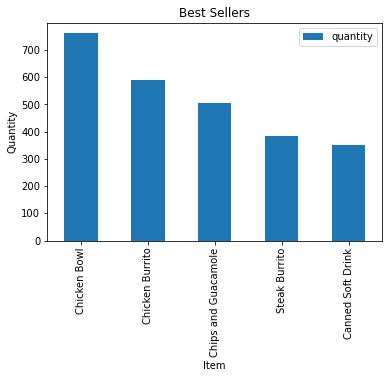

In [4]:
#Used pandas to filter the dataframe to the top 5 items bought
most_bought = chipo.groupby('item_name').sum().sort_values(by='quantity',ascending = False).iloc[:5,1:]

#Create the plot
most_bought.plot(kind = 'bar')

#Set titles, labels and print plot
plt.ylabel('Quantity')
plt.xlabel('Item')
plt.title('Best Sellers')
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order total price
#### Hint: Total should be in the X-axis and Items ordered in the Y-axis

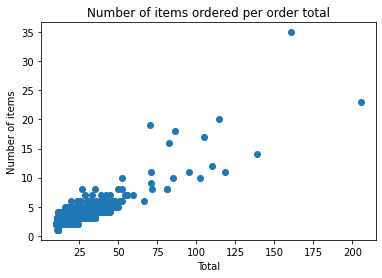

In [5]:
# Convert item_price column to a decimal 
converter = lambda x: float(x[1:])
chipo['Order_total'] = chipo['item_price'].apply(converter)
#Use pandas to group orders together and get their total price
items_per_total = chipo.groupby('order_id').sum()

#Create plot
plt.scatter(items_per_total['Order_total'],items_per_total['quantity'],)
plt.title('Number of items ordered per order total')
plt.xlabel('Total')
plt.ylabel('Number of items')
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

### Which is more popular, chicken or steak?

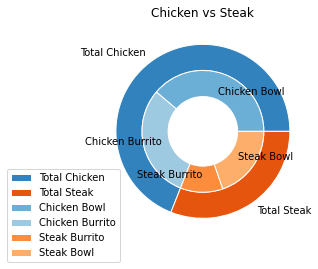

In [6]:
#Group items by name and get the total quantity, filter to only have the 4 items we need and assign it to inner_vals
chipo = chipo.groupby('item_name').sum()
inner_vals = chipo['quantity'].loc[(chipo.index == 'Chicken Bowl') | (chipo.index == 'Chicken Burrito') | \
                    (chipo.index == 'Steak Burrito')| (chipo.index == 'Steak Bowl')]

#Get tht total of bowls and burritos for both steak and chicken 
total_chicken = chipo['quantity'].loc[(chipo.index == 'Chicken Bowl') | (chipo.index == 'Chicken Burrito')].sum()
total_steak = chipo['quantity'].loc[(chipo.index == 'Steak Burrito') | (chipo.index == 'Steak Bowl')].sum()
outer_vals = pd.DataFrame([total_chicken,total_steak])

#Create empty figure
fig, ax = plt.subplots()
size = .3

#Creat cmap and labels
cmap = get_cmap('tab20c')
inner_colors = cmap([1,2,5,6])
outer_colors = cmap(np.arange(2)*4)
inner_labels = ['Chicken Bowl', 'Chicken Burrito', 'Steak Burrito', 'Steak Bowl']
outer_labels = ['Total Chicken ', 'Total Steak']

#Outer slices
ax.pie(outer_vals.values.flatten(), radius=1, colors=outer_colors,
      wedgeprops=dict(width=size, edgecolor='w'), labels=outer_labels)
#inner slices
ax.pie(inner_vals.values.flatten(), radius=1-size,colors=inner_colors,
      wedgeprops=dict(width=size, edgecolor='w'), labels=inner_labels, labeldistance=.7)

ax.set(aspect='equal', title='Chicken vs Steak')
plt.legend(loc=(-.4,-.1))
plt.show()